In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

In [2]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# cmap = get_cmap('gist_rainbow')
cmap = get_cmap('turbo')

rgba = cmap(0.5)
print(rgba)

(0.64362, 0.98999, 0.23356, 1.0)


In [3]:
test_vk = {}
for k in range(1, 8):
    test_vk[k] =  pd.read_excel(f"gpt_label_v{k}.xlsx")

In [4]:
dict_exp = {
    1: "zero-shot",
    2: "zero-shot+adv", 
    3: "zero-shot+adv+i",
    4: "one-shot+adv",
    5: "few(2)-shot+adv",
    6: "few(3)-shot+adv",
    7: "few(4)-shot+adv",
}

In [5]:
k = 1
o = test_vk[k]
metrics = pd.DataFrame(classification_report(o["label"], o["gpt-label"], digits=4, output_dict=True))["0 1".split()]
metrics = metrics.reset_index().rename(columns={"index": "metric"})
metrics["model"] = dict_exp[k]
for k in range(2, 8):
    o = test_vk[k]
    metricsk = pd.DataFrame(classification_report(o["label"], o["gpt-label"], digits=4, output_dict=True))["0 1".split()]
    metricsk = metricsk.reset_index().rename(columns={"index": "metric"})
    metricsk["model"] = dict_exp[k]
    
    metrics = pd.concat([metrics, metricsk])
metrics

,metric,0,1,model
0,precision,0.961957,0.261663,zero-shot
1,recall,0.327172,0.948529,zero-shot
2,f1-score,0.488276,0.410175,zero-shot
3,support,541.000000,136.000000,zero-shot
0,precision,0.962185,0.289294,zero-shot+adv
1,recall,0.423290,0.933824,zero-shot+adv
2,f1-score,0.587933,0.441739,zero-shot+adv
3,support,541.000000,136.000000,zero-shot+adv
0,precision,0.976879,0.261905,zero-shot+adv+i
1,recall,0.312384,0.970588,zero-shot+adv+i


In [13]:
othersC1 = {
    "dummy_most_frequent": 0.00,
    "dummy_stratified": .1545,
    "dummy_uniform": .3060,
    "YouChat (zero-shot)": 0.5079,
    "Rule-based": 0.5776, 
    "XGBoost+Mix": 0.7220,    
    "General (XGBoost)": 0.7761,
    "BETO mt": 0.7915,
}

othersC0 = {
    "dummy_most_frequent": .8883,
    "dummy_stratified": .8360,
    "dummy_uniform": .6382,
    "YouChat (zero-shot)": 0.7082,
    "Rule-based": 0.9227, 
    "XGBoost+Mix": 0.9838,    
    "General (XGBoost)": 0.9903,
    "BETO mt": 0.9759,
}

Text(0.5, 0, 'GPT-3 train strategy')

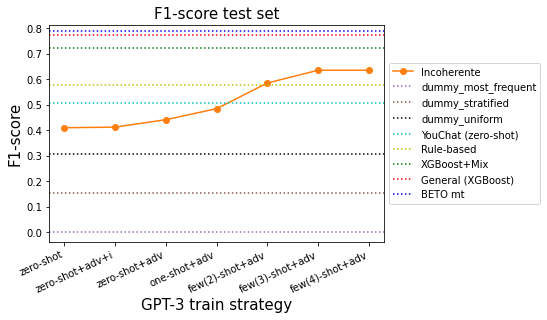

In [14]:
i = 1
t = metrics[metrics["metric"] == "f1-score"].sort_values("1")[f"model {i}".split()]
plt.plot(t["model"], t[str(i)], color="tab:orange", label=["Coherente", "Incoherente"][i], marker="o", linestyle="-")
for i, (k, v) in enumerate(othersC1.items()):
    plt.axhline(y = v, color = ["tab:purple", "tab:brown", "k", "c", "y", "g", "r", "b"][i], linestyle = ':', label=k)
    
plt.xticks(rotation=25, ha='right');
plt.legend(ncol=1, loc='center left', bbox_to_anchor=(1, 0.5))
# plt.grid(True);
plt.title("F1-score test set", size=15)
plt.ylabel("F1-score", size=15)
plt.xlabel("GPT-3 train strategy", size=15)

Text(0.5, 0, 'GPT-3 train strategy')

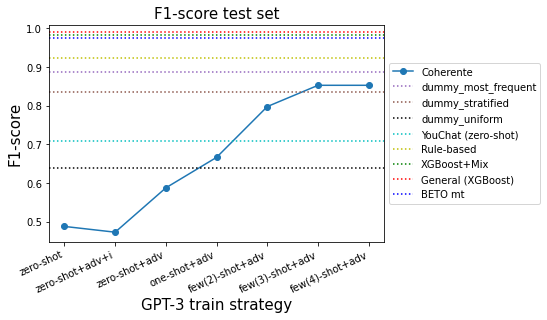

In [15]:
i = 0
t = metrics[metrics["metric"] == "f1-score"].sort_values("1")[f"model {i}".split()]
plt.plot(t["model"], t[str(i)], color="tab:blue", label=["Coherente", "Incoherente"][i], marker="o", linestyle="-")
for i, (k, v) in enumerate(othersC0.items()):
    plt.axhline(y = v, color = ["tab:purple", "tab:brown", "k", "c", "y", "g", "r", "b"][i], linestyle = ':', label=k)
    
plt.xticks(rotation=25, ha='right');
plt.legend(ncol=1, loc='center left', bbox_to_anchor=(1, 0.5))
# plt.grid(True);
plt.title("F1-score test set", size=15)
plt.ylabel("F1-score", size=15)
plt.xlabel("GPT-3 train strategy", size=15)